# Prédiction de la Survie des Passagers du Titanic

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics #Pour utiliser le R²
from sklearn.preprocessing import PolynomialFeatures

In [25]:
data = pd.read_csv(r'C:\Users\IDEAPAD\Desktop\GOMYCODE\Titanic\Resources\titanic-passengers.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,Collander Mr. Erik Gustaf,male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,Jensen Mr. Hans Peder,male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,Davidson Mr. Thornton,male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [26]:
data = data.drop(['Ticket', 'Fare', 'Cabin', 'Embarked', 'PassengerId'], axis=1)#Suppression des colonnes jugées inutiles
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,No,2,Collander Mr. Erik Gustaf,male,28.0,0,0
1,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0
2,No,3,Jensen Mr. Hans Peder,male,20.0,0,0
3,No,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4
4,No,1,Davidson Mr. Thornton,male,31.0,1,0


In [27]:
encoder = LabelEncoder()
data['Survived'] = encoder.fit_transform(data['Survived'])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,0,2,Collander Mr. Erik Gustaf,male,28.0,0,0
1,0,3,Moen Mr. Sigurd Hansen,male,25.0,0,0
2,0,3,Jensen Mr. Hans Peder,male,20.0,0,0
3,0,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4
4,0,1,Davidson Mr. Thornton,male,31.0,1,0


In [28]:
data.shape

(891, 7)

In [29]:
data.describe()#Récupération des infos sur les colonnes 

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [30]:
data = data.dropna(axis=0)#Suppression des lignes contenant des valeurs nulles
data.shape

(714, 7)

In [31]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,0,2,Collander Mr. Erik Gustaf,male,28.0,0,0
1,0,3,Moen Mr. Sigurd Hansen,male,25.0,0,0
2,0,3,Jensen Mr. Hans Peder,male,20.0,0,0
3,0,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4
4,0,1,Davidson Mr. Thornton,male,31.0,1,0


Text(0.5, 1.0, 'Homme')

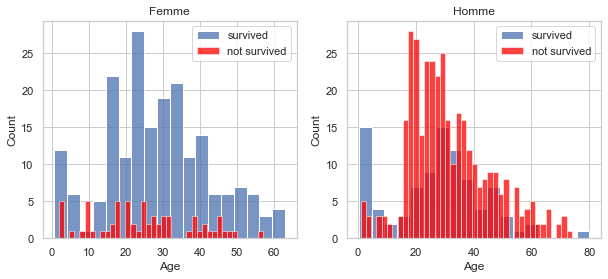

In [32]:
#Corrélation entre l'age et le sexe dans la survie de l'individu
sns.set_theme(style="whitegrid")

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Sex']=='female'] #DF contenant seulement les femmes 
men = data[data['Sex']=='male'] #DF contenant seulement les hommmes 

ax = sns.histplot(women[women['Survived']==1].Age, bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age, bins=40, label = not_survived, ax = axes[0], kde =False, color='Red')
ax.legend()
ax.set_title('Femme')

ax = sns.histplot(men[men['Survived']==1].Age, bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age, bins=40, label = not_survived, ax = axes[1], kde = False, color='Red')
ax.legend()
ax.set_title('Homme')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

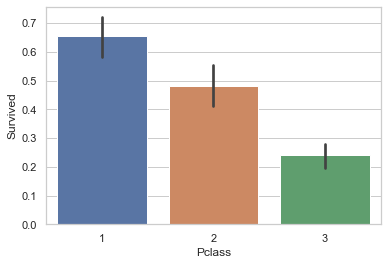

In [33]:
#Importance de la classe dans la survie de l'individu
sns.barplot(x='Pclass', y='Survived', data=data)

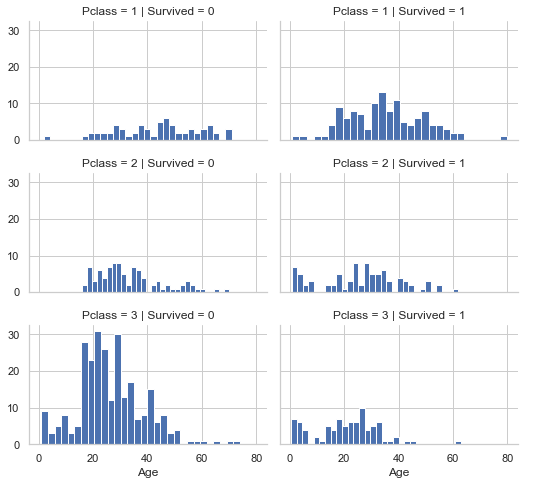

In [34]:
grid = sns.FacetGrid(data, col="Survived", row="Pclass", height=2.3, aspect=1.6)
grid.map(plt.hist, "Age", bins=30)
grid.add_legend()

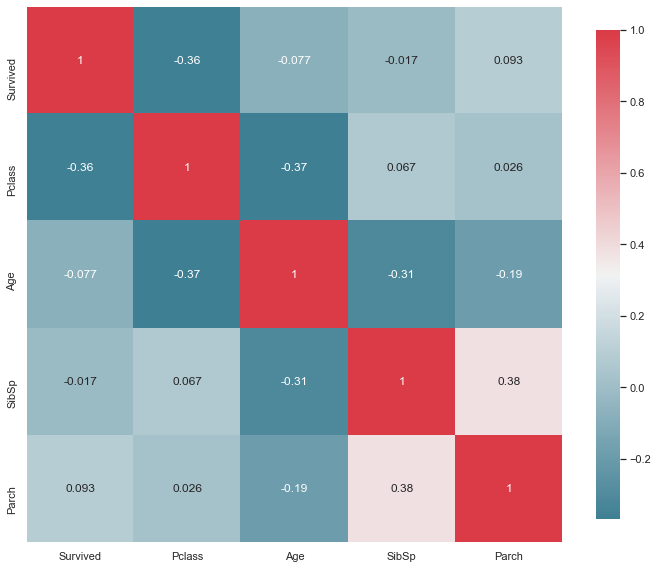

In [35]:
#HeadMap
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
    
plot_correlation_map(data)

In [36]:
data.groupby(['Sex', 'Pclass']).mean()

Survived        Age     SibSp     Parch
Sex    Pclass                                         
female 1       0.964706  34.611765  0.541176  0.494118
       2       0.918919  28.722973  0.500000  0.621622
       3       0.460784  21.750000  0.823529  0.950980
male   1       0.396040  41.281386  0.376238  0.336634
       2       0.151515  30.740707  0.373737  0.242424
       3       0.150198  26.507589  0.490119  0.256917

In [37]:
tab_name = data['Name'].values
mylist = []
for val in tab_name:
    if "Capt." in val:
        mylist.append("Capt")
    elif "Col." in val:
        mylist.append("Col")
    elif "Major." in val:
        mylist.append("Major")
    elif "Dr." in val:
        mylist.append("Dr")
    elif "Rev." in val:
        mylist.append("Rev")
    elif "Jonkheer." in val:
        mylist.append("Jonkheer")
    elif "Don." in val:
        mylist.append("Don")
    elif "Sir." in val:
        mylist.append("Sir")
    elif "Lady." in val:
        mylist.append("Lady")
    elif "the Countess." in val:
        mylist.append("The Countess")
    elif "Dona." in val:
        mylist.append("Dona")
    elif "Mme." in val:
        mylist.append("Mme")
    elif "Mlle." in val:
        mylist.append("Mlle")
    elif "Miss." in val:
        mylist.append("Miss")
    elif "Ms." in val:
        mylist.append("Ms")
    elif "Mr." in val:
        mylist.append("Mr")
    elif "Mrs." in val:
        mylist.append("Mrs")
    elif "Master." in val:
        mylist.append("Master")

data['Title'] = mylist
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Title
0,0,2,Collander Mr. Erik Gustaf,male,28.0,0,0,Mr
1,0,3,Moen Mr. Sigurd Hansen,male,25.0,0,0,Mr
2,0,3,Jensen Mr. Hans Peder,male,20.0,0,0,Mr
3,0,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4,Mrs
4,0,1,Davidson Mr. Thornton,male,31.0,1,0,Mr


In [38]:
#Changement des titres grâce au dictionnaire
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "The Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                    }

titles = data['Title'].values
new_List=[]
for title in titles:
    for key, value in Title_Dictionary.items():
        if title == key:
            new_List.append(value)
data['Title'] = new_List
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Title
0,0,2,Collander Mr. Erik Gustaf,male,28.0,0,0,Mrs
1,0,3,Moen Mr. Sigurd Hansen,male,25.0,0,0,Mrs
2,0,3,Jensen Mr. Hans Peder,male,20.0,0,0,Mrs
3,0,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4,Mrs
4,0,1,Davidson Mr. Thornton,male,31.0,1,0,Mrs
